# <p style="background-color:lightblue;font-family:newtimeroman;font-size:180%;color:black;text-align:center;border-radius:20px 20px;"><b>EDA Project - Sales Data </b></p>

<b>Contains:</b>
<ul>
<li><a href="#import-library">Importing Libraries</a></li>
<li><a href="#loading-dataset">Loading The Dataset</a></li>
<li><a href="#understanding-dataset">Understanding The Dataset</a></li>
<li><a href="#organizing-columns">Organizing Columns</a></li>
<li><a href="#nan-values">NaN Values</a></li>
<li><a href="#create-graphs">Creating Graphs</a></li>
</ul>

<a id='import-library'></a>
# <font color='navy'> <b>Importing Libraries</b><font color='black'> 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px

from skimpy import skim

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='navy'> <b>Loading The Dataset</b><font color='black'> 
Firstly, you should define df0 as the original data. Then, you can create a df variable to analysis the dataset using copy() function.

In [12]:
df0 = pd.read_csv("sales_data.csv")
df = df0.copy()

In [13]:
df.head()

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,Salesperson,Region
0,ORD00076,PRD991,"Smartwatch, Camera, Headphones",154.88971109205679,8,0.15,CUST7975,2022-03-31 00:00:00,NaN,North
1,ORD00491,PRD400,Laptop,free,19,0.20,CUST6889,2021-01-06 00:00:00,Charlie,North
2,ORD00369,PRD957,Camera,770.6350827794904,16,0.05,CUST4092,Unknown,Alice,West
3,ORD00490,PRD232,NaN,82.95197721398569,1,0.15,CUST2238,2023-08-14 00:00:00,Charlie,North
4,ORD00228,PRD123,Laptop,250.42946041877397,11,0.20,CUST8442,2020-08-15 00:00:00,Evan,North


**OrderID:** A unique identifier for each sale order.\
**ProductID:** A unique identifier for each product.\
**ProductName:** Name of product.\
**UnitPrice:** The price of a single unit of the product.\
**Quantity:** The amount of product.\
**Discount:** The amount of discount.\
**CustomerID:** A unique identifier for each customer.\
**SaleDate:** The date when the sale occurred.\
**Salesperson:** The name of the employee responsible for the sale.\
**Region:** The geographic area where the sale was made.

<a id='understanding-dataset'></a>
# <font color='navy'> <b>Understanding The Dataset</b><font color='black'> 

In [16]:
df.duplicated().sum()

15

In [17]:
df = df.drop_duplicates()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 0 to 524
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderID      510 non-null    object 
 1   ProductID    510 non-null    object 
 2   ProductName  476 non-null    object 
 3   UnitPrice    484 non-null    object 
 4   Quantity     510 non-null    int64  
 5   Discount     510 non-null    float64
 6   CustomerID   458 non-null    object 
 7   SaleDate     503 non-null    object 
 8   Salesperson  459 non-null    object 
 9   Region       510 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 43.8+ KB


In total, dataset has 510 entries and 10 columns. In 2nd, 3rd, 6th, 7th and 8th columns data has some NaN values.

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,510.0,9.158824,187.997702,-999.0,4.00,11.0,15.00,999.0
Discount,510.0,0.102843,0.070270,0.0,0.05,0.1,0.15,0.2


The dataset has negative value as minimum value. Quantity columns can't include negative values so these values should be found and changed.

In [22]:
df.describe(include= "object").T

,count,unique,top,freq
OrderID,510,500,ORD00463,2
ProductID,510,391,PRD366,4
ProductName,476,101,Camera,92
UnitPrice,484,388,-,35
CustomerID,458,440,CUST9395,3
SaleDate,503,408,TBD,10
Salesperson,459,10,Diana,96
Region,510,5,East,111


In [23]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 510    │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 10     │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA   ┃ NA %   ┃ mean     ┃ sd         ┃ p0     ┃ p25    ┃ p50  ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Quantity        │    0 │      0 │    9.159 │        188 │   -999 │      4 │   11 │    15 │   999 │     ▇   │  │
│ │ Discount        │    0 │      0 │   0.1028 │    0.07027 │      0 │   0.05 │  0.1 │  0.15 │   0.2 │ ▇▇ ▇▇▇  │  │
│ └─────────────────┴──────┴────────┴──────────┴────────────┴────────┴────────┴──────┴───────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ OrderID                   │       0 │          0 │                            1 │                      510 │  │
│ │ ProductID                 │       0 │          0 │                            1 │                      510 │  │
│ │ ProductName               │      34 │       6.67 │                          1.4 │                      726 │  │
│ │ UnitPrice                 │      26 │        5.1 │                         0.95 │                      484 │  │
│ │ CustomerID                │      52 │       10.2 │                          0.9 │                      458 │  │
│ │ SaleDate                  │       7 │       1.37 │                          1.9 │                      988 │  │
│ │ Salesperson               │      51 │         10 │                          0.9 │                      459 │  │
│ │ Region                    │       0 │          0 │                            1 │                      510 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [24]:
df.isnull().sum()

OrderID         0
ProductID       0
ProductName    34
UnitPrice      26
Quantity        0
Discount        0
CustomerID     52
SaleDate        7
Salesperson    51
Region          0
dtype: int64

In [25]:
df.isnull().sum().sum()

170

In total, the dataset has **170 NaN values**.

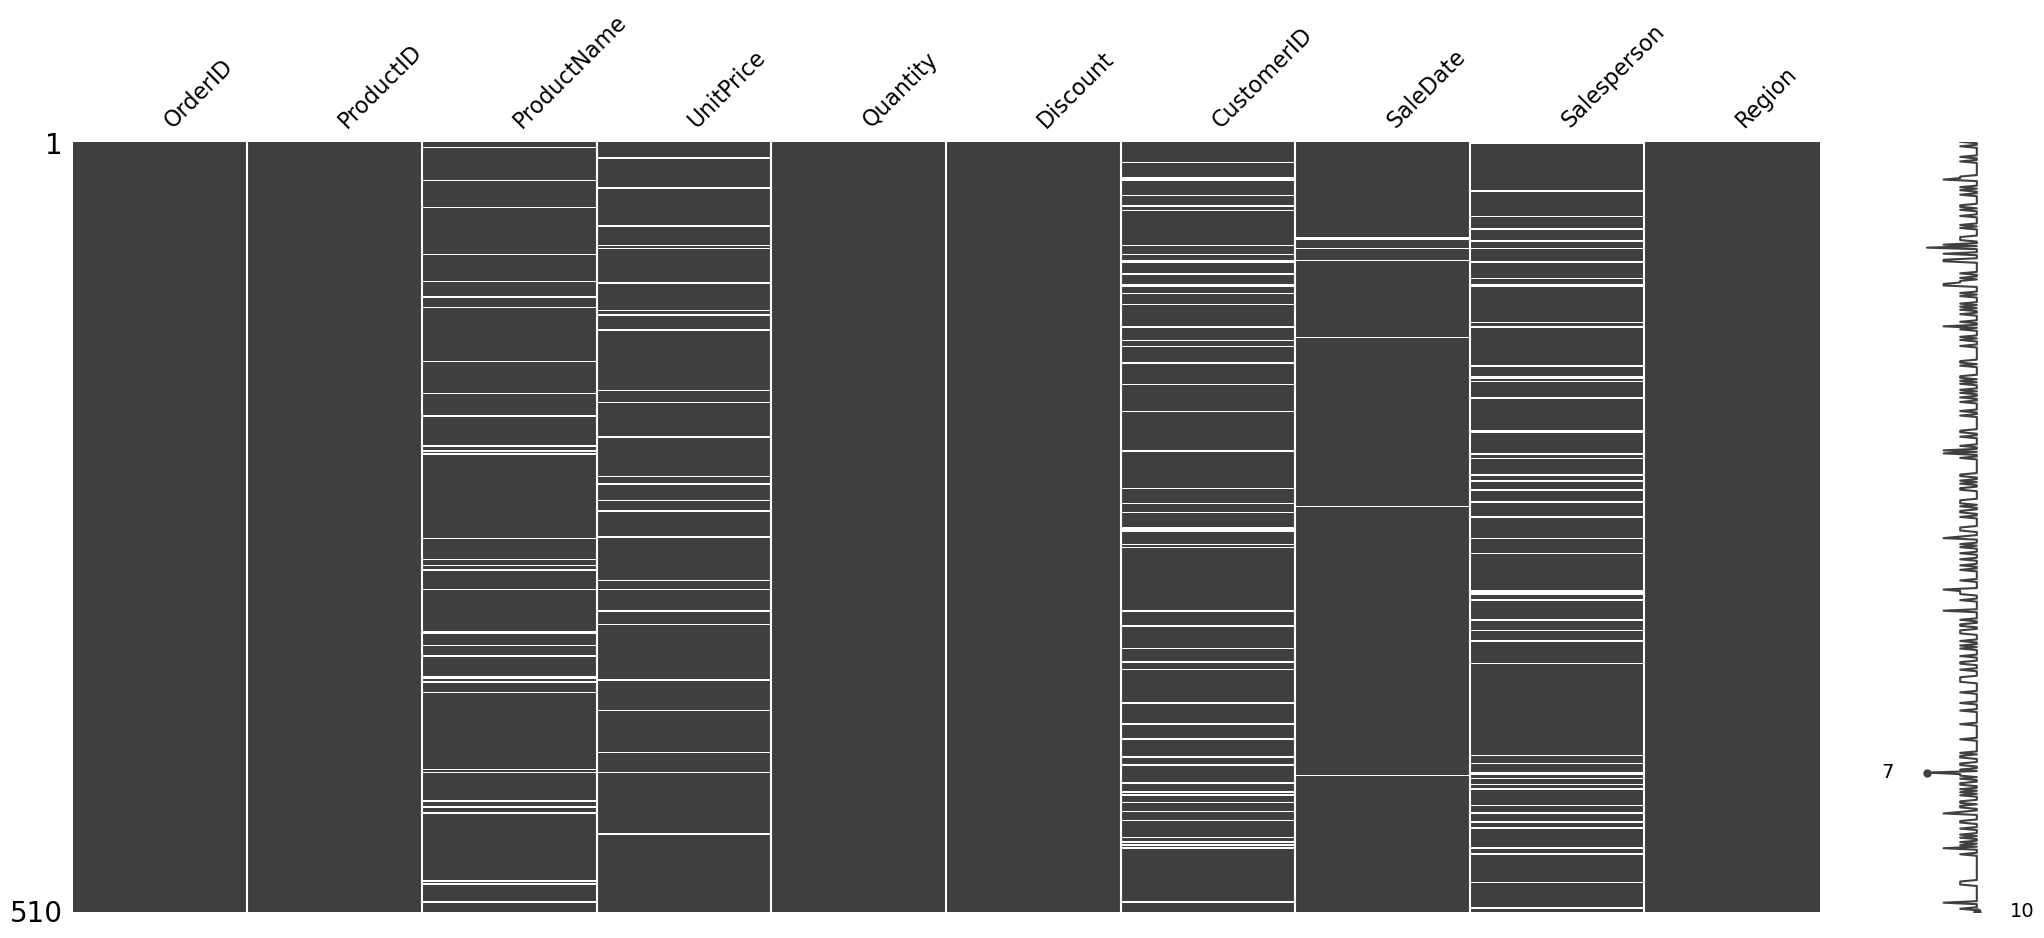

In [27]:
msno.matrix(df);

In [28]:
# The number of unique values

df.nunique()

OrderID        500
ProductID      391
ProductName    101
UnitPrice      388
Quantity        36
Discount         5
CustomerID     440
SaleDate       408
Salesperson     10
Region           5
dtype: int64

<a id='organizing-columns'></a>
# <font color='navy'> <b>Organizing Columns</b><font color='black'> 

## <font color='royalblue'> <b>OrderID and ProductID</b><font color='black'> 

**OrderID**
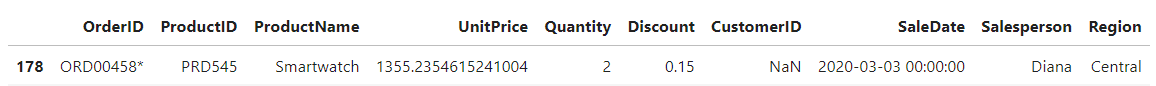
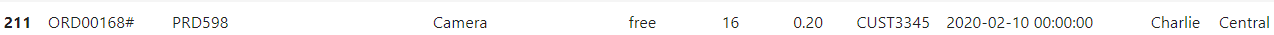
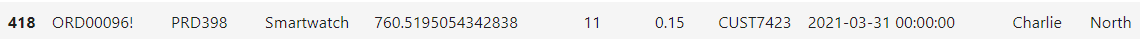

**ProductID**
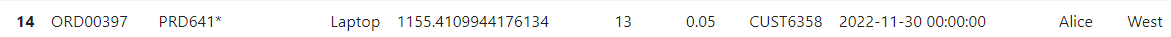
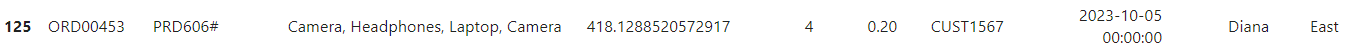

As you can see, some values of OrderID and ProductID columns have **"*"**, **"#"** and **"!"** signs at the end of ids. You should get these signs away using **.str.replace()** function.

In [32]:
df['OrderID'] = df['OrderID'].str.replace("[#!*]", "", regex= True)
df["OrderID"] = df["OrderID"].astype(str)

df['ProductID'] = df['ProductID'].str.replace("[#!*]", "", regex= True)
df["ProductID"] = df["ProductID"].astype(str)

In [33]:
df.sample(5)

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,Salesperson,Region
444,ORD00301,PRD657,"Smartwatch, Smartphone, Laptop, Headphones",1354.2076283837175,15,0.15,CUST8892,2020-01-02 00:00:00,Diana,East
75,ORD00253,PRD467,Headphones,89.53741831599201,1,0.15,CUST4990,2020-10-06 00:00:00,Charlie,South
28,ORD00280,PRD519,"Smartphone, Smartphone, Camera",99.69663931566448,8,0.00,CUST4227,2020-05-29 00:00:00,Diana,South
19,ORD00166,PRD727,Camera,569.9904748003091,6,0.05,CUST3427,2023-09-27 00:00:00,Diana,Central
54,ORD00048,PRD588,Smartwatch,1036.7307940285014,-4,0.05,CUST4097,2021-05-23 00:00:00,Evan,South


## <font color='royalblue'> <b>ProductName</b><font color='black'> 

In [35]:
df["ProductName"] = df["ProductName"].str.strip()
df["ProductName"] = df["ProductName"].str.title()

In [36]:
df.sample(5)

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,Salesperson,Region
371,ORD00407,PRD386,NaN,Check,13,0.20,CUST1569,2022-08-09 00:00:00,Diana,North
303,ORD00310,PRD789,Smartphone,-,17,0.15,CUST6421,2020-07-19 00:00:00,Diana,South
1,ORD00491,PRD400,Laptop,free,19,0.20,CUST6889,2021-01-06 00:00:00,Charlie,North
139,ORD00117,PRD397,Smartphone,462.6076268083847,18,0.20,CUST8693,2020-05-26 00:00:00,Diana,East
432,ORD00355,PRD365,Smartwatch,866.7634711191774,2,0.00,CUST3083,2020-07-16 00:00:00,Charlie,South


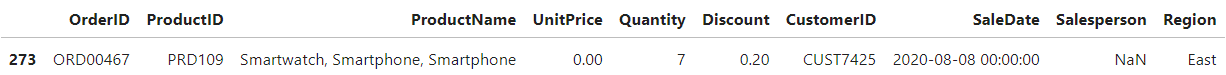

For this project, you can use the first product name if there are more than one product name in the ProductName value.

In [38]:
df["ProductName"] = df["ProductName"].str.split(", ").str[0]

There are some misspelled product names in this column. You should replace them with the right ones.

In [40]:
df["ProductName"] = df.ProductName.replace(["Laptpo", "Camra", "Headphons", "Smratphone", "Smartwach"], ["Laptop", "Camera", "Headphones", "Smartphone", "Smartwatch"])

In [41]:
df.sample(5)

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,Salesperson,Region
53,ORD00473,PRD908,Laptop,1000.0505845663738,20,0.05,CUST7071,2022-10-02 00:00:00,Alice,South
204,ORD00136,PRD182,NaN,Check,3,0.05,NaN,2022-01-09 00:00:00,Charlie,Central
2,ORD00369,PRD957,Camera,770.6350827794904,16,0.05,CUST4092,Unknown,Alice,West
354,ORD00404,PRD303,Camera,724.7038358013738,14,0.05,NaN,2020-10-28 00:00:00,Charlie,West
214,ORD00002,PRD494,Headphones,-,12,0.00,CUST1017,2022-09-06 00:00:00,Alice,North


In [42]:
df.ProductName.unique()

array(['Smartwatch', 'Laptop', 'Camera', nan, 'Headphones', 'Smartphone'],
      dtype=object)

## <font color='royalblue'> <b>UnitPrice</b><font color='black'>  

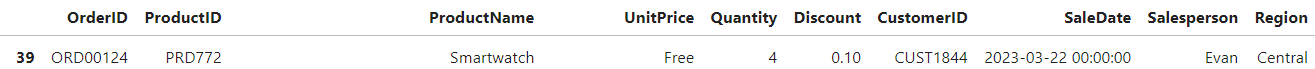
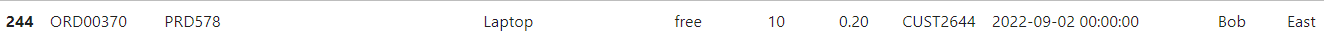
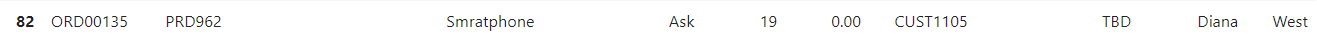
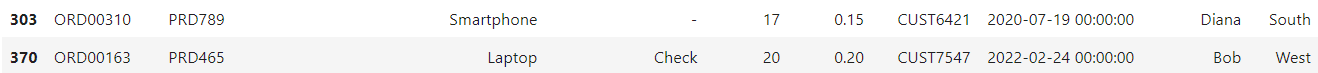

UnitPrice column has **"Free"**, **"free"**, **"Ask"**, **"Check"** and **"-"** values. "Free" and "free" values can be turned into 0.00 and other values can be turned into NaN values.

In [46]:
df["UnitPrice"] = df.UnitPrice.replace(["Free", "free"], 0)
df["UnitPrice"] = df.UnitPrice.replace(["Check", "Ask", "-"], np.nan)

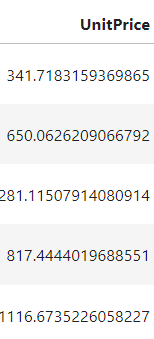

As you can see above, UnitPrice values have lots of decimal place. If you round values to 2 decimal place dataset will look cleaner and better.

In [48]:
df["UnitPrice"] = df.UnitPrice.astype(float)
df["UnitPrice"] = df.UnitPrice.round(2)

In [49]:
df.sample(5)

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,Salesperson,Region
256,ORD00213,PRD953,Headphones,526.78,18,0.00,NaN,2023-11-09 00:00:00,Diana,North
494,ORD00231,PRD735,Camera,1112.03,999,0.20,CUST6165,2022-01-19 00:00:00,Alice,North
212,ORD00372,PRD928,Headphones,0.00,8,0.05,CUST9030,2020-05-21 00:00:00,Bob,West
513,ORD00365,PRD139,Headphones,1414.97,-4,0.15,CUST6187,2022-02-09 00:00:00,Diana,South
145,ORD00157,PRD561,NaN,NaN,-1,0.10,CUST8864,2020-05-24 00:00:00,Evan,East


## <font color='royalblue'> <b>Quantity</b><font color='black'> 

In [51]:
df.Quantity.unique()

array([   8,   19,   16,    1,   11,    6,   14,    5, -999,   17,    3,
         13,    7,   12,   15,  999,    4,   20,    9,    0,   -5,   10,
         -4,    2,   18,  -11,   -9,   -1,  -10,   -8,  -12,  -20,  -19,
        -17,   -6,  -18], dtype=int64)

There are some negative values in Quantity column. You can replace negative values with positive values using **abs()** function.

In [53]:
df["Quantity"] = df["Quantity"].abs()

In [54]:
df.Quantity.unique()

array([  8,  19,  16,   1,  11,   6,  14,   5, 999,  17,   3,  13,   7,
        12,  15,   4,  20,   9,   0,  10,   2,  18], dtype=int64)

There are 2 values that do not seem normal which are **0** and **999**.
 - If there is a value of 0 in the Quantity column, it means no sales have been made.
 - If there is a value of 999 in the Quantity column, it can be a outlier value.

In [56]:
df.Quantity.value_counts().sort_index()

Quantity
0       7
1      31
2      18
3      21
4      27
5      29
6      28
7      12
8      30
9      18
10     18
11     22
12     34
13     38
14     26
15     17
16     29
17     23
18     21
19     20
20     23
999    18
Name: count, dtype: int64

Let's find the indices of rows that have 0 and 999 values in Quantity column and delete these rows from the dataset.

In [58]:
indices_to_drop = df[df["Quantity"].isin([0, 999])].index
indices_to_drop

Index([ 11,  29,  38,  48, 112, 133, 144, 154, 169, 210, 251, 257, 326, 343,
       344, 345, 359, 391, 416, 429, 436, 447, 450, 494, 507],
      dtype='int64')

In [59]:
df.drop(indices_to_drop, inplace=True)

## <font color='royalblue'> <b>Discount</b><font color='black'> 

In [61]:
df.Discount.unique()

array([0.15, 0.2 , 0.05, 0.  , 0.1 ])

In [62]:
df.Discount.value_counts()

Discount
0.05    106
0.15    103
0.20    100
0.10     90
0.00     86
Name: count, dtype: int64

Discount column seems OK for now. Let's continue with SaleDate column.

## <font color='royalblue'> <b>SaleDate</b><font color='black'> 

In [65]:
df.SaleDate.unique()

array(['2022-03-31 00:00:00', '2021-01-06 00:00:00', 'Unknown',
       '2023-08-14 00:00:00', '2020-08-15 00:00:00',
       '2021-08-21 00:00:00', '2022-12-21 00:00:00',
       '2022-01-02 00:00:00', '2023-07-31 00:00:00',
       '2022-05-22 00:00:00', '2023-11-21 00:00:00',
       '2021-07-31 00:00:00', '2022-03-26 00:00:00',
       '2022-11-30 00:00:00', '2020-06-16 00:00:00',
       '2022-04-22 00:00:00', '2020-05-08 00:00:00',
       '2023-09-27 00:00:00', '2021-04-24 00:00:00',
       '2023-06-19 00:00:00', '2023-08-08 00:00:00',
       '2023-08-11 00:00:00', '2021-06-20 00:00:00',
       '2022-07-20 00:00:00', '2022-09-17 00:00:00',
       '2020-08-07 00:00:00', '2020-05-29 00:00:00',
       '2022-03-28 00:00:00', '2021-12-20 00:00:00',
       '2021-07-21 00:00:00', '2020-03-29 00:00:00',
       '2021-02-11 00:00:00', '2023-03-29 00:00:00',
       '2023-11-02 00:00:00', '2023-03-22 00:00:00',
       '2022-02-23 00:00:00', '2022-08-12 00:00:00',
       '2022-08-04 00:00:00', '2023

SaleDate column has some values such as **"Unknown"** and **"TBD"**. You can turn these values into **NaN** or **NaT** values.

In [67]:
# replacing "Unknown" and "TBD" values with NaT (Not a time)

df["SaleDate"] = df.SaleDate.replace(["Unknown", "TBD"], pd.NaT)

In [68]:
# turning the dtype of SaleDate column into datetime

df["SaleDate"] = pd.to_datetime(df["SaleDate"])

In [69]:
df.sample(5)

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,Salesperson,Region
281,ORD00174,PRD348,Laptop,747.33,4,0.20,CUST9591,2022-11-21,Daina,South
289,ORD00131,PRD233,Camera,0.00,13,0.15,CUST9311,2021-05-09,Bob,East
111,ORD00023,PRD733,Smartphone,NaN,4,0.15,CUST1233,2020-01-09,Bob,South
189,ORD00368,PRD419,Smartphone,960.33,8,0.00,CUST5511,2021-12-18,Charlie,East
422,ORD00377,PRD292,Camera,699.86,11,0.05,NaN,2021-12-02,Bob,Central


## <font color='royalblue'> <b>SalesPerson</b><font color='black'> 

First of all, let's rename the Salesperson columns as the other columns name styles.

In [72]:
df.rename(columns={"Salesperson": "SalesPerson"}, inplace=True)

In [73]:
df["SalesPerson"] = df["SalesPerson"].str.strip()

In [74]:
df.SalesPerson.unique()

array([nan, 'Charlie', 'Alice', 'Evan', 'Daina', 'Eavn', 'Diana', 'Bob',
       'Ailce', 'Bbo'], dtype=object)

This output shows that some names entered wrong spelling. You should change these wrong ones with the right ones.

In [76]:
df["SalesPerson"] = df.SalesPerson.replace(["Bbo", "Eavn", "Chalrie", "Ailce", "Daina"], ["Bob", "Evan", "Charlie", "Alice", "Diana"])

In [77]:
df.sample(5)

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region
12,ORD00180,PRD325,Laptop,1241.46,17,0.15,CUST6229,2021-07-31,Alice,West
269,ORD00042,PRD544,Smartphone,113.52,1,0.00,NaN,2023-03-30,Charlie,East
468,ORD00050,PRD986,Camera,NaN,2,0.05,CUST6556,2020-07-30,Bob,East
167,ORD00340,PRD995,Camera,671.62,9,0.10,CUST4258,2021-06-29,Bob,West
185,ORD00488,PRD504,Smartwatch,222.33,20,0.15,CUST6266,2022-03-22,Diana,West


In [78]:
df.SalesPerson.value_counts()

SalesPerson
Diana      98
Alice      94
Charlie    83
Evan       81
Bob        80
Name: count, dtype: int64

## <font color='royalblue'> <b>Region</b><font color='black'> 

In [80]:
df["Region"] = df["Region"].str.strip()

In [81]:
df.Region.unique()

array(['North', 'West', 'Central', 'South', 'East'], dtype=object)

In [82]:
df.Region.value_counts()

Region
East       108
West       103
South      102
Central     87
North       85
Name: count, dtype: int64

In [83]:
# data set information after organized the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485 entries, 0 to 524
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      485 non-null    object        
 1   ProductID    485 non-null    object        
 2   ProductName  453 non-null    object        
 3   UnitPrice    394 non-null    float64       
 4   Quantity     485 non-null    int64         
 5   Discount     485 non-null    float64       
 6   CustomerID   435 non-null    object        
 7   SaleDate     463 non-null    datetime64[ns]
 8   SalesPerson  436 non-null    object        
 9   Region       485 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 41.7+ KB


<a id='nan-values'></a>
# <font color='navy'> <b>NaN Values</b><font color='black'> 

In [85]:
df.sample(10)

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region
258,ORD00294,PRD112,Smartwatch,1454.38,13,0.20,NaN,2023-07-07,Diana,South
58,ORD00486,PRD396,Smartphone,1481.51,13,0.10,CUST2896,2022-07-13,Bob,West
292,ORD00078,PRD295,Smartphone,NaN,8,0.15,CUST5524,2020-11-24,Charlie,South
341,ORD00413,PRD506,Laptop,NaN,15,0.00,CUST8679,2023-03-09,Alice,North
409,ORD00130,PRD875,Laptop,1007.88,8,0.10,CUST3307,2023-09-25,Bob,Central
230,ORD00434,PRD385,Smartwatch,244.24,8,0.05,CUST9612,2022-09-11,NaN,South
286,ORD00013,PRD588,Headphones,1413.05,15,0.15,CUST4868,2021-09-21,Evan,South
255,ORD00033,PRD847,Laptop,1436.88,15,0.20,CUST9131,2021-05-10,Bob,South
63,ORD00483,PRD267,Laptop,0.00,1,0.20,CUST9473,NaT,Bob,South
464,ORD00242,PRD284,Laptop,294.06,13,0.20,CUST4942,2020-05-20,NaN,North


In [86]:
df.isnull().sum()

OrderID         0
ProductID       0
ProductName    32
UnitPrice      91
Quantity        0
Discount        0
CustomerID     50
SaleDate       22
SalesPerson    49
Region          0
dtype: int64

There are 5 columns named **ProductName, UnitPrice, CustomerID, SaleDate, SalesPerson** have NaN values. 
 - You can't fill the NaN values in CustomerID column because of IDs are unique values.
 - You can fill the NaN values in SaleDate using forward fill or backward fill methods.
 - For SalesPerson column, you can use groupby formula and fill the NaN values ​​according to the person who made the most sales by year and region.
 - You can fill the NaN values ​​in the ProductName column based on ProductID or UnitPrice.
 - You can fill in the NaN values ​​in the UnitPrice column by finding the median or average values ​​based on ProductName.

## <font color='royalblue'> <b>SaleDate</b><font color='black'> 

You can fill the NaN values in SaleDate column with using forward fill method.

In [90]:
df['SaleDate'] = df['SaleDate'].fillna(method='ffill')

In [91]:
df.SaleDate.isnull().sum()

0

## <font color='royalblue'> <b>SalesPerson</b><font color='black'> 

You can fill in the NaN values ​​according to the person who made the most sales by **year** and **region**.

In [94]:
# Adding a new column named "Year"

df["Year"] = df['SaleDate'].dt.year

In [95]:
df.groupby(["Year"])["SalesPerson"].value_counts()

Year  SalesPerson
2020  Alice          27
      Evan           24
      Diana          22
      Bob            21
      Charlie        12
2021  Alice          25
      Bob            24
      Charlie        24
      Evan           23
      Diana          20
2022  Diana          29
      Charlie        24
      Alice          21
      Bob            19
      Evan           18
2023  Diana          27
      Charlie        23
      Alice          21
      Bob            16
      Evan           16
Name: count, dtype: int64

In [96]:
df.groupby(["Region"])["SalesPerson"].value_counts()

Region   SalesPerson
Central  Alice          20
         Diana          17
         Charlie        13
         Evan           13
         Bob            11
East     Alice          23
         Bob            22
         Diana          22
         Evan           17
         Charlie        16
North    Charlie        24
         Alice          16
         Bob            13
         Evan           12
         Diana          11
South    Diana          29
         Charlie        18
         Evan           17
         Alice          16
         Bob            14
West     Evan           22
         Bob            20
         Alice          19
         Diana          19
         Charlie        12
Name: count, dtype: int64

In [97]:
df.groupby(["Year", "Region"])["SalesPerson"].value_counts()

Year  Region   SalesPerson
2020  Central  Diana           7
               Alice           3
               Bob             3
               Evan            2
               Charlie         1
      East     Alice           7
               Bob             5
               Diana           5
               Evan            4
               Charlie         1
      North    Alice           7
               Evan            7
               Bob             4
               Charlie         3
               Diana           1
      South    Diana           6
               Evan            6
               Bob             5
               Alice           4
               Charlie         4
      West     Alice           6
               Evan            5
               Bob             4
               Charlie         3
               Diana           3
2021  Central  Alice           6
               Bob             3
               Charlie         3
               Diana           3
               E

In [98]:
df['SalesPerson'] = df.groupby(["Year", "Region"])["SalesPerson"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [99]:
df.SalesPerson.isnull().sum()

0

## <font color='royalblue'> <b>ProductName</b><font color='black'> 

In [101]:
# if the NaN value in ProductName column has the same ProductID with a product, fill in the NaN value with that product name.

product_id_to_name = df.dropna(subset=['ProductName']).set_index('ProductID')['ProductName'].to_dict()

def fill_product_name(row):
    if pd.isna(row['ProductName']):
        return product_id_to_name.get(row['ProductID'], np.nan)
    else:
        return row['ProductName']

df['ProductName'] = df.apply(fill_product_name, axis=1)

In [102]:
# If the NaN value does not match the ProductIDs of the products, calculate the UnitPrice median for each product
# and fill in the NaN value in the ProductName column with the closest product.

median_prices = df.groupby('ProductName')['UnitPrice'].median()

def fill_product_name(row):
    if pd.isna(row['ProductName']):
        distances = {name: abs(price - row['UnitPrice']) for name, price in median_prices.items()}
        closest_product = min(distances, key=distances.get)
        return closest_product
    else:
        return row['ProductName']

df['ProductName'] = df.apply(fill_product_name, axis=1)

In [103]:
df.ProductName.isnull().sum()

0

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485 entries, 0 to 524
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      485 non-null    object        
 1   ProductID    485 non-null    object        
 2   ProductName  485 non-null    object        
 3   UnitPrice    394 non-null    float64       
 4   Quantity     485 non-null    int64         
 5   Discount     485 non-null    float64       
 6   CustomerID   435 non-null    object        
 7   SaleDate     485 non-null    datetime64[ns]
 8   SalesPerson  485 non-null    object        
 9   Region       485 non-null    object        
 10  Year         485 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(6)
memory usage: 43.6+ KB


## <font color='royalblue'> <b>ProductID</b><font color='black'> 

There is no NaN values in ProductID column. However, there should be a single Product ID for each product. The same products should not have different Product IDs. If there was another column named "Brand" or "Version" in this data set, another product identity could be defined for different brands or versions of the same products. However, it would be more logical to define one product ID for each product for this data set.

In [107]:
# another method (you should do this for each product)

# df.loc[df["ProductName"] == "Camera", "ProductID"].mode()[0]
# df.loc[df["ProductName"] == "Camera", "ProductID"] = df.loc[df["ProductName"] == "Camera", "ProductID"].mode()[0]

In [108]:
# another method (you can use these three codes and all product names and product IDs will be updated) 

# most_frequent_product_ids = df.groupby('ProductName')['ProductID'].agg(lambda x: x.mode()[0])
# product_mapping = most_frequent_product_ids.to_dict()
# df['ProductID'] = df['ProductName'].map(product_mapping)

### <font color='cornflowerblue'> <b>Defining Product ID for Product "Camera"</b><font color='black'> 

In [110]:
df[(df.ProductName == "Camera")].ProductID.mode()

0    PRD681
1    PRD949
Name: ProductID, dtype: object

In [111]:
df[(df.ProductID == "PRD681")]

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region,Year
13,ORD00339,PRD681,Camera,463.20,3,0.15,NaN,2022-03-26,Diana,East,2022
81,ORD00346,PRD681,Camera,1485.63,12,0.15,CUST5437,2020-05-26,Diana,West,2020
135,ORD00079,PRD681,Smartwatch,118.83,6,0.15,NaN,2023-05-31,Charlie,West,2023
340,ORD00445,PRD681,Camera,549.81,19,0.10,NaN,2021-10-03,Bob,East,2021


In [112]:
df[(df.ProductID == "PRD949")]

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region,Year
52,ORD00011,PRD949,Camera,NaN,10,0.10,CUST3743,2022-11-02,Evan,East,2022
86,ORD00011,PRD949,Camera,NaN,10,0.10,CUST3743,2022-11-02,Evan,East,2022
98,ORD00138,PRD949,Camera,465.91,9,0.15,CUST6411,2022-03-16,Diana,North,2022


For **"PRD681"** id, there is a row that has **"Smartwatch"** as a ProductName. However, **"PRD949"** id has **only "Camera"** as ProductName. You can define **"PRD949"** ProductID to the **"Camera"**.

In [114]:
df.loc[df["ProductName"] == "Camera", "ProductID"] = "PRD949"

### <font color='cornflowerblue'> <b>Defining Product ID for Product "Laptop"</b><font color='black'>

In [116]:
df[(df.ProductName == "Laptop")].ProductID.mode()

0    PRD822
Name: ProductID, dtype: object

In [117]:
df[(df.ProductID == "PRD822")]

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region,Year
270,ORD00143,PRD822,Laptop,898.87,20,0.00,CUST5159,2022-04-21,Bob,West,2022
351,ORD00027,PRD822,Laptop,462.41,1,0.10,CUST4417,2022-07-30,Evan,East,2022
483,ORD00179,PRD822,Laptop,1069.96,16,0.05,CUST7588,2021-11-18,Alice,South,2021


In [118]:
df.loc[df["ProductName"] == "Laptop", "ProductID"] = "PRD822"

### <font color='cornflowerblue'> <b>Defining Product ID for Product "Headphones"</b><font color='black'> 

In [120]:
df[(df.ProductName == "Headphones")].ProductID.mode()

0    PRD253
Name: ProductID, dtype: object

In [121]:
df[(df.ProductID == "PRD253")]

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region,Year
73,ORD00484,PRD253,Headphones,1258.59,14,0.20,CUST7064,2021-06-12,Evan,West,2021
194,ORD00133,PRD253,Headphones,398.20,16,0.05,CUST2876,2023-09-01,Charlie,East,2023
484,ORD00484,PRD253,Headphones,1258.59,14,0.20,CUST7064,2021-06-12,Evan,West,2021


In [122]:
df.loc[df["ProductName"] == "Headphones", "ProductID"] = "PRD253"

### <font color='cornflowerblue'> <b>Defining Product ID for Product "Smartwatch"</b><font color='black'> 

In [124]:
df[(df.ProductName == "Smartwatch")].ProductID.mode()

0    PRD122
1    PRD182
2    PRD653
3    PRD657
4    PRD660
5    PRD701
6    PRD795
7    PRD919
Name: ProductID, dtype: object

In [125]:
df[(df.ProductID == "PRD122")]

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region,Year
64,ORD00416,PRD122,Smartwatch,NaN,8,0.05,CUST2437,2020-03-09,Bob,North,2020
509,ORD00217,PRD122,Smartwatch,NaN,5,0.00,CUST6640,2023-09-16,Alice,South,2023


In [126]:
df[(df.ProductID == "PRD653")]

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region,Year
76,ORD00139,PRD653,Smartwatch,298.50,17,0.20,CUST2025,2022-09-17,Diana,West,2022
453,ORD00102,PRD653,Smartwatch,857.73,19,0.05,NaN,2020-08-01,Charlie,South,2020


In [127]:
df.loc[df["ProductName"] == "Smartwatch", "ProductID"] = "PRD122"

### <font color='cornflowerblue'> <b>Defining Product ID for Product "Smartphone"</b><font color='black'> 

In [129]:
df[(df.ProductName == "Smartphone")].ProductID.mode()

0    PRD193
1    PRD218
2    PRD397
3    PRD433
4    PRD455
5    PRD553
6    PRD759
7    PRD789
Name: ProductID, dtype: object

In [130]:
df[(df.ProductID == "PRD193")]

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region,Year
375,ORD00110,PRD193,Smartphone,428.43,19,0.0,CUST8302,2022-07-23,Charlie,South,2022
462,ORD00087,PRD193,Smartphone,NaN,1,0.1,CUST3269,2022-05-26,Alice,North,2022


In [131]:
df[(df.ProductID == "PRD218")]

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region,Year
202,ORD00214,PRD218,Smartphone,1480.85,18,0.00,CUST1021,2020-02-17,Diana,South,2020
268,ORD00167,PRD218,Smartphone,710.62,11,0.15,CUST2154,2022-02-17,Bob,North,2022


In [132]:
df.loc[df["ProductName"] == "Smartphone", "ProductID"] = "PRD193"

In [133]:
df.groupby(["ProductID"])["ProductName"].value_counts()

ProductID  ProductName
PRD122     Smartwatch      83
PRD193     Smartphone      85
PRD253     Headphones      90
PRD822     Laptop         101
PRD949     Camera         126
Name: count, dtype: int64

## <font color='royalblue'> <b>UnitPrice</b><font color='black'> 

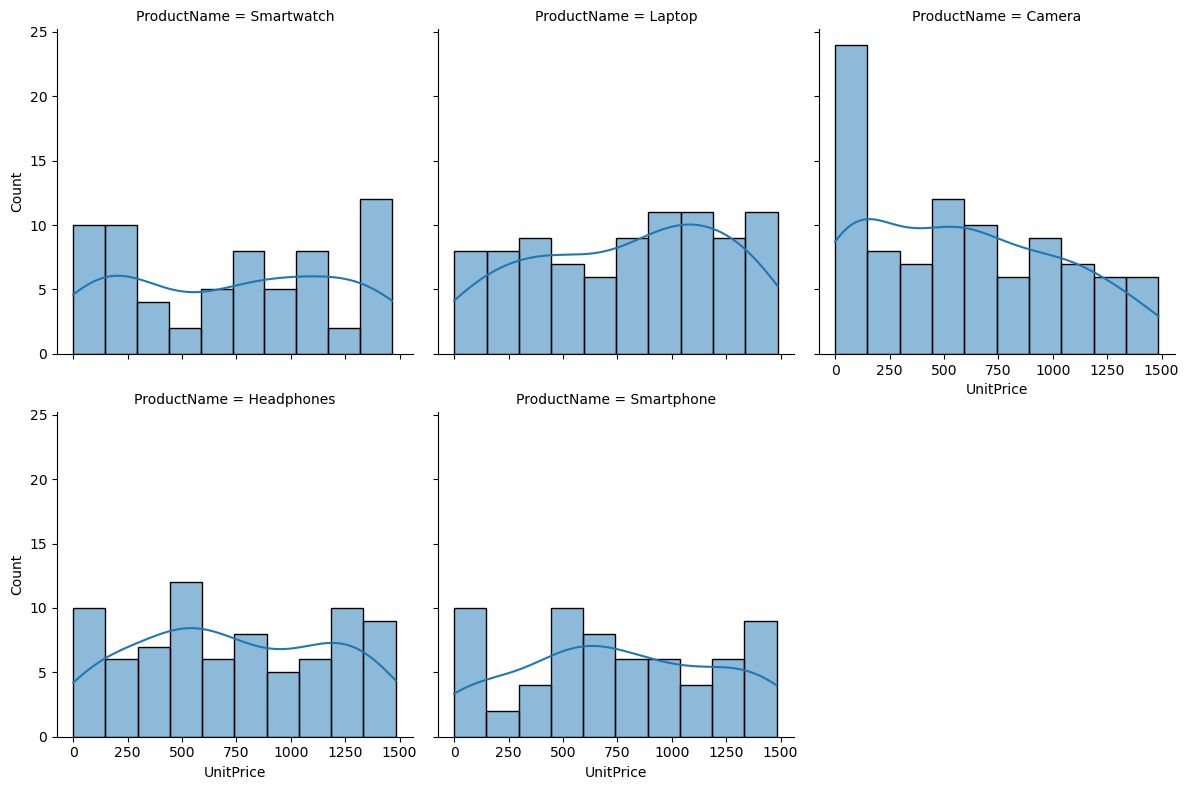

In [135]:
g = sns.FacetGrid(df, col="ProductName", col_wrap=3, height=4)
g.map(sns.histplot, "UnitPrice", bins=10, kde=True);

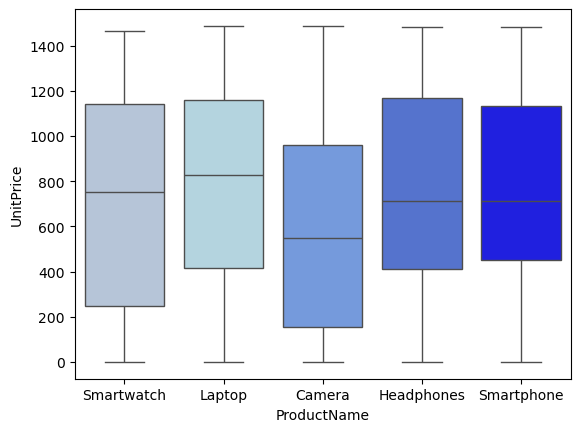

In [136]:
sns.boxplot(df, x = "ProductName" , y = "UnitPrice", 
            palette={"Smartwatch": "lightsteelblue", "Laptop": "lightblue", "Camera": "cornflowerblue", 
                     "Headphones": "royalblue", "Smartphone": "blue"}
           );

As seen in the histogram charts, some products have **unbalanced price** distributions. Therefore, filling NaN values ​​with **median** can better preserve the overall structure of the dataset.

In [138]:
df['UnitPrice'] = df.groupby('ProductName')['UnitPrice'].transform(lambda x: x.fillna(x.median()))

In [139]:
df.UnitPrice.isnull().sum()

0

## <font color='royalblue'> <b>CustomerID</b><font color='black'> 

In [257]:
df.CustomerID.isnull().sum()

50

ID numbers are unique values. Because of that, the NaN values in CustomerID column cannot be filled with any method.

In [265]:
df.dropna(subset=['CustomerID'], inplace=True)

In [267]:
df.CustomerID.isnull().sum()

0

## <font color='royalblue'> <b>After Filling The NaN Values</b><font color='black'> 

In [269]:
df.isnull().sum()

OrderID        0
ProductID      0
ProductName    0
UnitPrice      0
Quantity       0
Discount       0
CustomerID     0
SaleDate       0
SalesPerson    0
Region         0
Year           0
TotalPrice     0
dtype: int64

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435 entries, 0 to 484
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      435 non-null    object        
 1   ProductID    435 non-null    object        
 2   ProductName  435 non-null    object        
 3   UnitPrice    435 non-null    float64       
 4   Quantity     435 non-null    int64         
 5   Discount     435 non-null    float64       
 6   CustomerID   435 non-null    object        
 7   SaleDate     435 non-null    datetime64[ns]
 8   SalesPerson  435 non-null    object        
 9   Region       435 non-null    object        
 10  Year         435 non-null    int32         
 11  TotalPrice   435 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(6)
memory usage: 42.5+ KB


In [273]:
df.sample(5)

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region,Year,TotalPrice
480,ORD00184,PRD822,Laptop,105.52,6,0.15,CUST4805,2023-12-14,Bob,West,2023,538.152
348,ORD00239,PRD822,Laptop,294.82,18,0.05,CUST7039,2022-10-11,Charlie,West,2022,5041.422
162,ORD00132,PRD193,Smartphone,1256.11,8,0.00,CUST3205,2021-04-24,Alice,East,2021,10048.880
125,ORD00210,PRD822,Laptop,681.06,3,0.20,CUST5411,2021-01-06,Charlie,North,2021,1634.544
20,ORD00049,PRD193,Smartphone,1457.48,16,0.15,CUST2007,2020-02-29,Evan,South,2020,19821.728


The last thing you can do about organizing the data may be sorting SaleDate column ascending.

In [275]:
df = df.sort_values(by='SaleDate', ascending=True).reset_index(drop=True)

In [277]:
df.head()

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region,Year,TotalPrice
0,ORD00301,PRD122,Smartwatch,1354.21,15,0.15,CUST8892,2020-01-02,Diana,East,2020,17266.1775
1,ORD00422,PRD822,Laptop,1420.68,13,0.15,CUST8644,2020-01-03,Alice,South,2020,15698.5140
2,ORD00023,PRD193,Smartphone,711.99,4,0.15,CUST1233,2020-01-09,Bob,South,2020,2420.7660
3,ORD00158,PRD193,Smartphone,711.99,14,0.15,CUST7977,2020-01-13,Bob,Central,2020,8472.6810
4,ORD00383,PRD122,Smartwatch,1439.11,8,0.05,CUST2864,2020-01-18,Evan,Central,2020,10937.2360


In [279]:
# if you want to save the last version of the data set as .csv file, you can run the code below with deleting the # sign.

# df.to_csv("edited_data.csv", index= False)

<a id='create-graphs'></a>
# <font color='navy'> <b>Creating Graphs</b><font color='black'> 

## <font color='royalblue'> <b>Sales Made By SalesPerson On A Yearly Basis</b><font color='black'> 

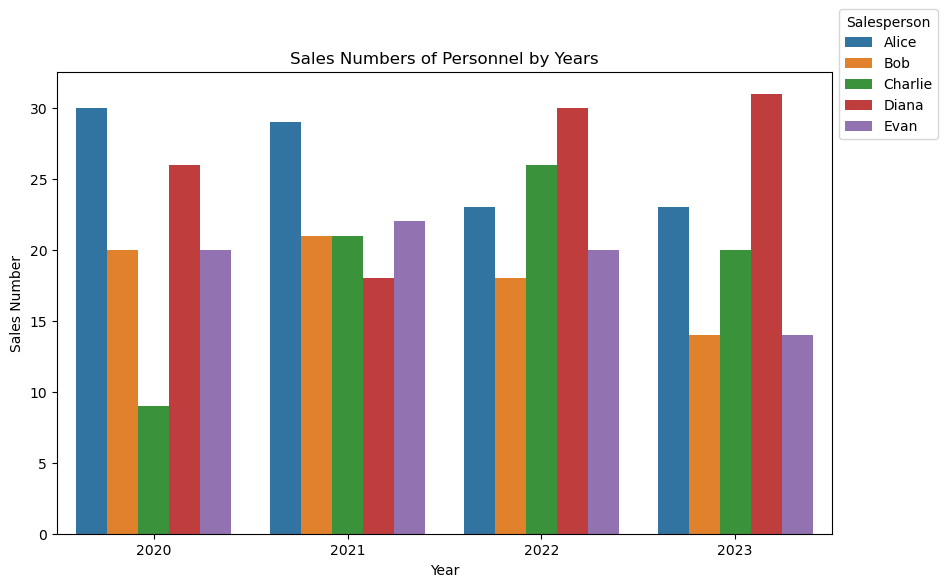

In [281]:
# Calculating the total sales amount based on SalesPerson and Year
SalesCount = df.SalesPerson.value_counts(ascending= False)
sales_counts = df.groupby(['SalesPerson', 'Year']).size().reset_index(name='SalesCount')

# Creating Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='SalesCount', hue='SalesPerson', data=sales_counts)

plt.title('Sales Numbers of Personnel by Years')
plt.xlabel('Year')
plt.ylabel('Sales Number')
plt.legend(title='Salesperson', bbox_to_anchor=(1, 1.15))
plt.show()

## <font color='royalblue'> <b>Sales Amount Of Products Sold By Years</b><font color='black'> 

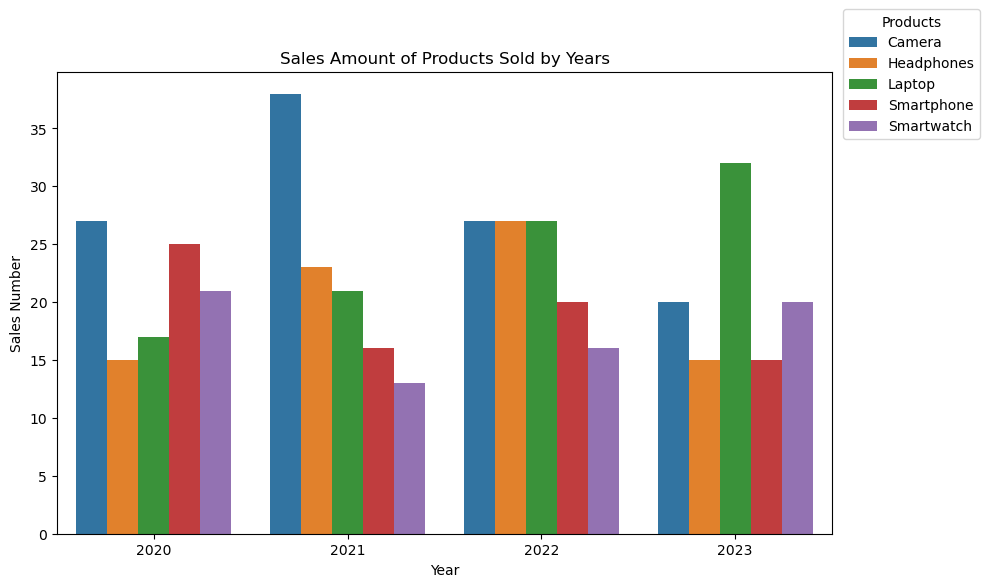

In [283]:
# Calculating the total sales amount based on ProductName and Year
SalesCount2 = df.ProductName.value_counts(ascending= False)
sales_counts2 = df.groupby(['ProductName', 'Year']).size().reset_index(name='SalesCount2')

# Creating Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='SalesCount2', hue='ProductName', data=sales_counts2)

plt.title('Sales Amount of Products Sold by Years')
plt.xlabel('Year')
plt.ylabel('Sales Number')
plt.legend(title='Products', bbox_to_anchor=(1.2, 1.15))
plt.show()

## <font color='royalblue'> <b>In Which Year Was More Income Generated?</b><font color='black'> 

In [285]:
df['TotalPrice'] = df['UnitPrice'] * df['Quantity'] * (1 - df['Discount'])

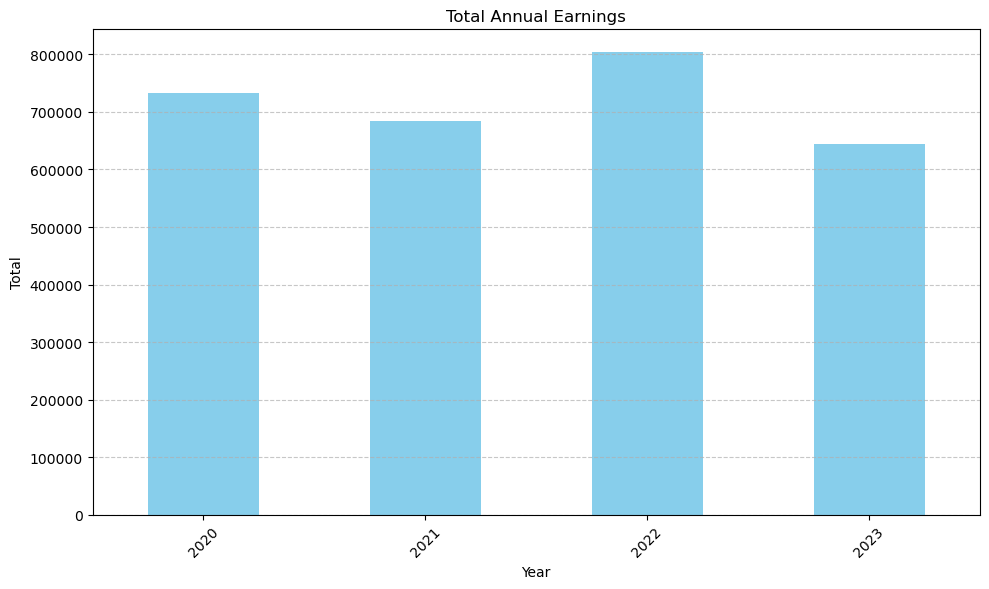

In [286]:
annual_totals = df.groupby('Year')['TotalPrice'].sum()

# Plotting
plt.figure(figsize=(10, 6))
annual_totals.plot(kind='bar', color='skyblue')

plt.title('Total Annual Earnings')
plt.xlabel('Year')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## <font color='royalblue'> <b>What Is The Correlation Between Quantity And Discount</b><font color='black'> 

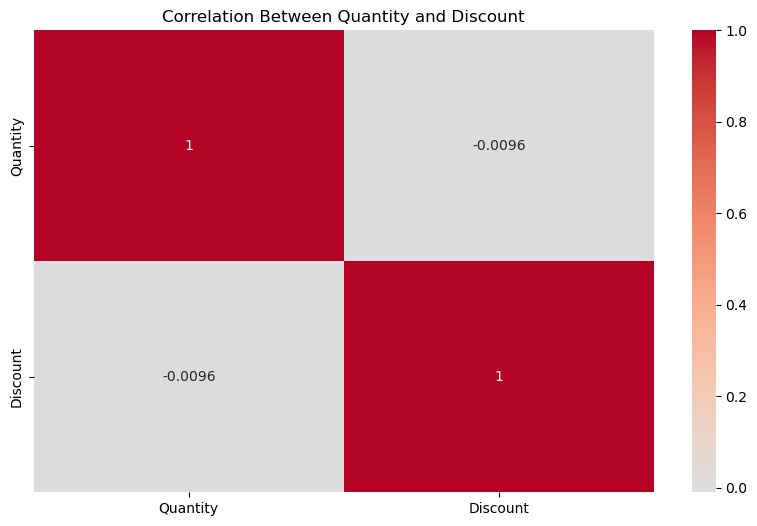

In [288]:
# Creating the graph
plt.figure(figsize=(10, 6))

sns.heatmap(df[['Quantity', 'Discount']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Quantity and Discount')

plt.show()

A correlation value of -0.2 indicates a **weak and negative relationship** between the **Quantity** and **Discount** columns. This suggests that there is generally not a strong correlation between the quantity of a product purchased and the discount rate. Therefore, small changes in discount are unlikely to significantly affect the quantity purchased.